In [2]:
%cd '../HOTS'
from Tools import netparam, knn, JensenShannon, BattachaNorm, histoscore, histoscore_lagorce
import numpy as np
import matplotlib.pyplot as plt
from os.path import isfile
import pickle

/home/antoine/homhots/HOTS/HOTS


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def printfig(fig, name):
    dpi_exp = None
    bbox = 'tight'
    path = '../../paper/5f22d412742c360001c92b46/fig/'
    #path = '../../GrimaldiEtAl2020HOTS_clone_laurent/fig'
    fig.savefig(path+name, dpi = dpi_exp, bbox_inches=bbox, transparent=True)

In [5]:
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
R = 2
tau = 0.07
nbclust = [4,8,16]
filt = 2

timestr = '2021-03-28'
record_path = '../Records/EXP_05_POKERDVS/'
dataset = 'poker'
nb_test = 20
nb_train = 48
ds = 1

nb_test = nb_test//ds
nb_train = nb_train//ds
print(f'training set size: {nb_train} - testing set: {nb_test}')

kNN = 3

verbose = False

training set size: 48 - testing set: 20


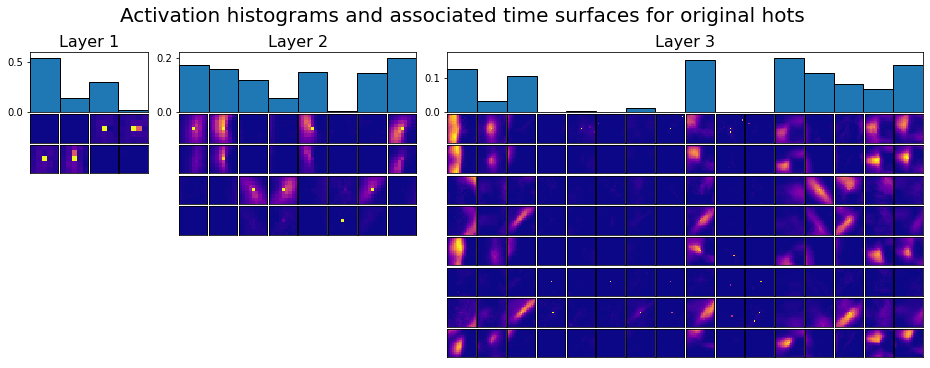

----------Averaged histograms----------
Performances for hots with Euclidian distance: 80.0%
Performances for hots with Bhattacharyya distance: 75.0%
Performances for hots with Jensen-Shannon distance: 75.0%
---------Per sample histograms---------
Performances for hots with  k-NN (k=3): 95.0%
Performances for hots with  k-NN using Jensen-Shannon as a metric (k=3): 95.0%


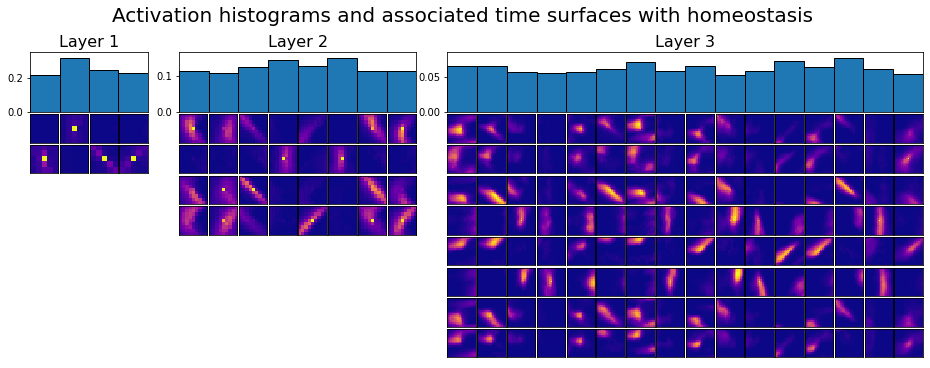

----------Averaged histograms----------
Performances for homhots with Euclidian distance: 75.0%
Performances for homhots with Bhattacharyya distance: 75.0%
Performances for homhots with Jensen-Shannon distance: 75.0%
---------Per sample histograms---------
Performances for homhots with  k-NN (k=3): 100.0%
Performances for homhots with  k-NN using Jensen-Shannon as a metric (k=3): 100.0%


In [5]:
for name in ['hots', 'homhots']:
    f_name = f'{record_path}{timestr}_results_fullset_histo_{name}.pkl'
    hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
    hotshom.plotlayer()
    if isfile(f_name):
        with open(f_name, 'rb') as file:
            scores = pickle.load(file)
    else:
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset, verbose=verbose)
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset, verbose=verbose)
        JS_kNN_score = knn(trainhistomap,testhistomap, k = kNN, weights = 'distance', metric = JensenShannon)
        kNN_score = knn(trainhistomap,testhistomap, k = kNN, weights = 'distance')
        
        trainhistomapav = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset, verbose=verbose)
        trainhistomapav2 = []
        for i in range(trainhistomapav.shape[0]):
            trainhistomapav2.append([i,trainhistomapav[i,:]])
        JS_score = knn(trainhistomapav2,testhistomap, k = 1, weights = 'uniform', metric = JensenShannon)
        BA_score = knn(trainhistomapav2,testhistomap, k = 1, weights = 'uniform', metric = BattachaNorm)
        EU_score = knn(trainhistomapav2,testhistomap, k = 1, weights = 'uniform')

        scores = [EU_score, BA_score, JS_score, kNN_score, JS_kNN_score]
        with open(f_name, 'wb') as file:
            pickle.dump(scores, file, pickle.HIGHEST_PROTOCOL)
        
    print('----------Averaged histograms----------')
    print(f'Performances for {name} with Euclidian distance: {np.round(scores[0],3)*100}%')
    print(f'Performances for {name} with Bhattacharyya distance: {np.round(scores[1],3)*100}%')
    print(f'Performances for {name} with Jensen-Shannon distance: {np.round(scores[2],3)*100}%')
    print('---------Per sample histograms---------')
    print(f'Performances for {name} with  k-NN (k={kNN}): {np.round(scores[3],3)*100}%')
    print(f'Performances for {name} with  k-NN using Jensen-Shannon as a metric (k={kNN}): {np.round(scores[4],3)*100}%')

# Trying the variability with different clustering (unsupervised learning of the features)

In [6]:
verbose=False
JS_score = []
JS_scorehom = []
JS_score_histav = []
JS_scorehom_histav = []
BA_score = []
BA_scorehom = []
BA_score_histav = []
BA_scorehom_histav = []
kNN6_score = []
kNN6_scorehom = []
kNN3_score = []
kNN3_scorehom = []

tau = 0.07

for name in ['hots', 'homhots']:
    for i in range(100):
        timestr = '2021-04-14_'+str(i)
        hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R, verbose=verbose)#, nb_learn=50)
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset, verbose=verbose)
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset, verbose=verbose)
        score = histoscore(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score.append(score[0]*100)
            JS_score.append(score[4]*100)
            kNN3_score.append(score[5]*100)
            kNN6_score.append(score[6]*100)
        else:
            BA_scorehom.append(score[0]*100)
            JS_scorehom.append(score[4]*100)
            kNN3_scorehom.append(score[5]*100)
            kNN6_scorehom.append(score[6]*100)
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset, verbose=verbose)
        score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score_histav.append(score[0]*100)
            JS_score_histav.append(score[4]*100)
        else:
            BA_scorehom_histav.append(score[0]*100)
            JS_scorehom_histav.append(score[4]*100)

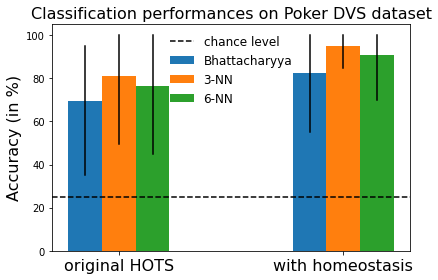

In [7]:
labels = ['original HOTS', 'with homeostasis']

JS_means = [np.mean(JS_score_histav), np.mean(JS_scorehom_histav)]
BA_means = [np.mean(BA_score_histav), np.mean(BA_scorehom_histav)]
kNN3_means = [np.mean(kNN3_score), np.mean(kNN3_scorehom)]
kNN6_means = [np.mean(kNN6_score), np.mean(kNN6_scorehom)]

JS_quant = [[np.quantile(JS_score_histav, 0.05),np.quantile(JS_score_histav, 0.95)], [np.quantile(JS_scorehom_histav, 0.05),np.quantile(JS_scorehom_histav, 0.95)]]
BA_quant = [[np.quantile(BA_score_histav, 0.05),np.quantile(BA_score_histav, 0.95)], [np.quantile(BA_scorehom_histav, 0.05),np.quantile(BA_scorehom_histav, 0.95)]]
kNN3_quant = [[np.quantile(kNN3_score, 0.05),np.quantile(kNN3_score, 0.95)], [np.quantile(kNN3_scorehom, 0.05),np.quantile(kNN3_scorehom, 0.95)]]
kNN6_quant = [[np.quantile(kNN6_score, 0.05),np.quantile(kNN6_score, 0.95)], [np.quantile(kNN6_scorehom, 0.05),np.quantile(kNN6_scorehom, 0.95)]]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - 3/2*width, JS_means, width, label='Jensen-Shannon')
rects2 = ax.bar(x - width, BA_means, width, label='Bhattacharyya')
rects3 = ax.bar(x, kNN3_means, width, label='3-NN')
rects4 = ax.bar(x + width, kNN6_means, width, label='6-NN')

for i in range(len(x)):
    #ax.plot([x[i] - 3/2*width,x[i] - 3/2*width], JS_quant[i], '-k')
    ax.plot([x[i] - width,x[i] - width], BA_quant[i], '-k')
    ax.plot([x[i],x[i]], kNN3_quant[i], '-k')
    ax.plot([x[i]+width,x[i]+width], kNN6_quant[i], '-k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.axhline(25, 0, 1, linestyle='--', color='k', label='chance level')
ax.set_ylabel('Accuracy (in %)', fontsize=16)
ax.set_title('Classification performances on Poker DVS dataset', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
leg = ax.legend(loc='upper center',fontsize=12)
leg.get_frame().set_alpha(0)

fig.tight_layout()

plt.show()

In [49]:
printfig(fig, 'poker_histo.pdf')

# Online classification performance

In [6]:
from Tools import fit_data, predict_data, classification_numbevents, classification_timescale

In [7]:
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
R = 2
tau = 0.07
nbclust = [4,8,16]
filt = 2

timestr = '2021-03-28'
record_path = '../Records/EXP_05_POKERDVS/'
dataset = 'poker'
nb_test = 20
nb_train = 48
ds = 1

nb_test = nb_test//ds
nb_train = nb_train//ds
print(f'training set size: {nb_train} - testing set: {nb_test}')

kNN = 3

verbose = False

training set size: 48 - testing set: 20


In [8]:
num_workers = 0
learning_rate = 0.005
beta1, beta2 = 0.9, 0.999
betas = (beta1, beta2)
num_epochs = 2 ** 5 + 1
print(f'number of epochs: {num_epochs}')
ds_ev = 1
tau_cla = 1e4
nb_class = 4

number of epochs: 33


## As a function of the number of events

/home/antoine/homhots/HOTS/HOTS/Tools.py:563: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)
/home/antoine/homhots/HOTS/HOTS/Tools.py:563: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


0 samples where not classified
---------------------------------------------for raw---------------------------------------------
Mean accuracy for raw: 94.19999999999999%
Last event accuracy for raw: 95.0%
Accuracy with argmax over the probabilities of a sample for raw: 100.0%
Accuracy when taking the highest counts of classified events for a sample for raw: 95.0%
-----------------------------------------------------------------------------------------------------
0 samples where not classified
---------------------------------------------for homhots---------------------------------------------
Mean accuracy for homhots: 98.5%
Last event accuracy for homhots: 100.0%
Accuracy with argmax over the probabilities of a sample for homhots: 95.0%
Accuracy when taking the highest counts of classified events for a sample for homhots: 95.0%
-----------------------------------------------------------------------------------------------------


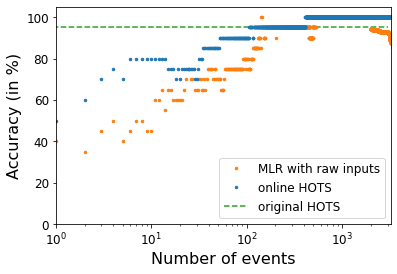

In [13]:
thres = None
colorz = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
legend_list = ['original HOTS', 'MLR with raw inputs', 'online HOTS']
namelist = ['raw', 'homhots']
fig_onl, ax_onl = plt.subplots()
ax_onl.hlines(95,0,3000, linestyles='dashed', color=colorz[2], label=legend_list[0])
for namnum, name in enumerate(namelist):
    f_name = f'{record_path}{timestr}_LR_results_{name}_{nbclust}_{nb_train}_{nb_test}_{ds_ev}.pkl'
    if isfile(f_name):
        with open(f_name, 'rb') as file:
            likelihood, true_target, time_scale = pickle.load(file)
    else:
        ds_ev = 1
        model, loss  = fit_data(name,timestr,record_path,filt,tau,R,nbclust,sigma,homeinv,jitter,dataset,nb_train, ds_ev,learning_rate,num_epochs,betas,tau_cla,jitonic=jitonic,subset_size=None,num_workers=num_workers,verbose=False)
        likelihood, true_target, time_scale = predict_data(model,name,timestr,record_path,filt,tau,R,nbclust,sigma, homeinv, jitter,dataset,nb_test,ds_ev,tau_cla,jitonic=jitonic,subset_size=None,num_workers=num_workers, verbose=False)
        with open(f_name, 'wb') as file:
            pickle.dump([likelihood, true_target, time_scale], file, pickle.HIGHEST_PROTOCOL)
    meanac, onlinac, lastac, maxprobac, maxevac, truepos, falsepos, lastev = classification_numbevents(likelihood, true_target, thres, nb_test, 1/nb_class)
    print(45*'-'+f'for {name}'+45*'-')
    print(f'Mean accuracy for {name}: {np.round(meanac,3)*100}%')
    print(f'Last event accuracy for {name}: {np.round(lastac,3)*100}%')
    print(f'Accuracy with argmax over the probabilities of a sample for {name}: {np.round(maxprobac,3)*100}%')
    print(f'Accuracy when taking the highest counts of classified events for a sample for {name}: {np.round(maxevac,3)*100}%')
    print(101*'-')
    ax_onl.semilogx(onlinac[:int(lastev)]*100, '.', ms=5, color=colorz[namnum], label = legend_list[namnum+1]);
ax_onl.axis([1,int(lastev),0,105]);
ax_onl.set_xlabel('Number of events', fontsize=16);
ax_onl.set_ylabel('Accuracy (in %)', fontsize=16);
plt.setp(ax_onl.get_yticklabels(), fontsize=12)
plt.setp(ax_onl.get_xticklabels(), fontsize=12)
#ax_onl.set_title('Accuracy as a function of the number of events', fontsize=16);
ax_onl.legend(fontsize=12, loc='lower right');

In [14]:
printfig(fig_onl, 'poker_online.pdf')

## As a function of time

/home/antoine/homhots/HOTS/HOTS/Tools.py:615: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


0 samples where not classified


/home/antoine/homhots/HOTS/HOTS/Tools.py:615: RuntimeWarning: Mean of empty slice
  onlinac = np.nanmean(matscor, axis=0)


0 samples where not classified


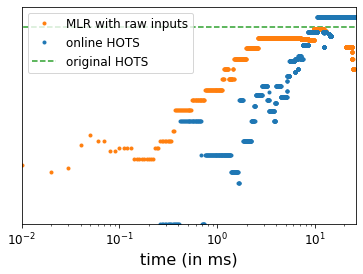

In [17]:
nb_classes = 4
timestep = 10
thres = None
namelist = ['raw', 'homhots']
legend_list = ['original HOTS','MLR with raw inputs', 'online HOTS']
colorz = ['#ff7f0e','#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
for namnum, name in enumerate(namelist):
    f_name = f'{record_path}{timestr}_LR_results_{name}_{nbclust}_{nb_train}_{nb_test}_{ds_ev}.pkl'
    with open(f_name, 'rb') as file:
        likelihood, true_target, timescale = pickle.load(file)
    meanac, onlinac, timesteps, lastime, truepos, falsepos = classification_timescale(likelihood, true_target, timescale, timestep, thres, nb_test, 1/nb_classes)
    ax.semilogx(timesteps/1e3,onlinac[:len(timesteps)]*100, '.', label=legend_list[namnum+1], color = colorz[namnum])
ax.axis([0.01,lastime/1e3,0,105]);
ax.hlines(95,0,lastime/1e3, linestyles='dashed', color=colorz[2], label=legend_list[0])
ax.set_xlabel('time (in ms)', fontsize=16);
ax.set_yticks([])
#ax.set_ylabel('Accuracy (in %)', fontsize=16);
plt.setp(ax.get_yticklabels(), fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=12)
ax.legend(fontsize=12, loc='upper left');

In [19]:
printfig(fig,'poker_online_time.pdf')

# Paremeter testing

In [25]:
verbose=False
JS_score = []
JS_scorehom = []
JS_score_histav = []
JS_scorehom_histav = []
BA_score = []
BA_scorehom = []
BA_score_histav = []
BA_scorehom_histav = []
kNN6_score = []
kNN6_scorehom = []
kNN3_score = []
kNN3_scorehom = []

tauz = [0.01, 0.02, 0.05, 0.07, 0.08, 0.09, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 5, 10, 20, 30]

for name in ['hots', 'homhots']:
    for tau in tauz:
        hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
        #hotshom.plotlayer()
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset, verbose=verbose)
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset, verbose=verbose)
        
        score = histoscore(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score.append(score[0])
            JS_score.append(score[4])
            kNN3_score.append(score[5])
            kNN6_score.append(score[6])
        else:
            BA_scorehom.append(score[0])
            JS_scorehom.append(score[4])
            kNN3_scorehom.append(score[5])
            kNN6_scorehom.append(score[6])
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset, verbose=verbose)
        score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score_histav.append(score[0])
            JS_score_histav.append(score[4])
        else:
            BA_scorehom_histav.append(score[0])
            JS_scorehom_histav.append(score[4])

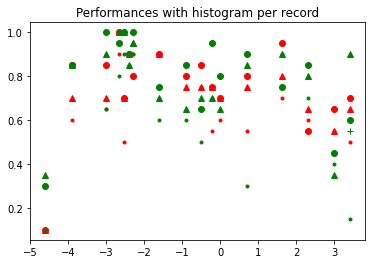

In [26]:
for i in range(len(tauz)):
    j = np.log(tauz[i])
    plt.plot(j,BA_score[i], 'r +')
    plt.plot(j,JS_score[i], 'r o')
    plt.plot(j,kNN3_score[i], 'r ^')
    plt.plot(j,kNN6_score[i], 'r .')
    plt.plot(j,BA_scorehom[i], 'g +')
    plt.plot(j,JS_scorehom[i], 'g o')
    plt.plot(j,kNN3_scorehom[i], 'g ^')
    plt.plot(j,kNN6_scorehom[i], 'g .')
    plt.title('Performances with histogram per record')